**Analysis and Regression of Beehive Data**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [3]:
#Converting .csv files to DataFrames

flow = pd.read_csv("flow_2017.csv")
humid = pd.read_csv("humidity_2017.csv")
temp = pd.read_csv("temperature_2017.csv")
weight = pd.read_csv("weight_2017.csv")

In [20]:
print(flow.head())
print(humid.head())
print(temp.head())
print(weight.head())

             timestamp  flow
0  2017-01-01 05:15:00     0
1  2017-01-01 05:16:00     0
2  2017-01-01 05:17:00     0
3  2017-01-01 05:18:00     0
4  2017-01-01 05:19:00     0
             timestamp   humidity
0  2017-01-01 05:00:00  92.406667
1  2017-01-01 06:00:00  92.270000
2  2017-01-01 07:00:00  92.575000
3  2017-01-01 08:00:00  92.840000
4  2017-01-01 09:00:00  93.640000
             timestamp  temperature
0  2017-01-01 05:00:00    -1.911244
1  2017-01-01 06:00:00    -1.866717
2  2017-01-01 07:00:00    -2.077833
3  2017-01-01 08:00:00    -2.327167
4  2017-01-01 09:00:00    -2.791233
             timestamp   weight
0  2017-01-01 05:15:00  52.6974
1  2017-01-01 05:16:00  52.6974
2  2017-01-01 05:17:00  52.6974
3  2017-01-01 05:18:00  52.6974
4  2017-01-01 05:19:00  52.6973


In [5]:
timestamp = flow['timestamp']
flow_1 = flow['flow']
humid_1 = humid['humidity']
temp_1 = temp['temperature']
weight_1 = weight['weight']

finaldf = pd.concat([flow_1, humid_1, temp_1, weight_1], axis=1, join='inner').sort_index()

In [6]:
finaldf

,flow,humidity,temperature,weight
0,0,92.406667,-1.911244,52.6974
1,0,92.270000,-1.866717,52.6974
2,0,92.575000,-2.077833,52.6974
3,0,92.840000,-2.327167,52.6974
4,0,93.640000,-2.791233,52.6973
...,...,...,...,...
8732,0,90.255000,11.470500,52.1219
8733,0,91.685000,11.087500,52.1219
8734,0,92.323333,11.187833,52.1217
8735,0,92.675000,11.519833,52.1537


<Axes: >

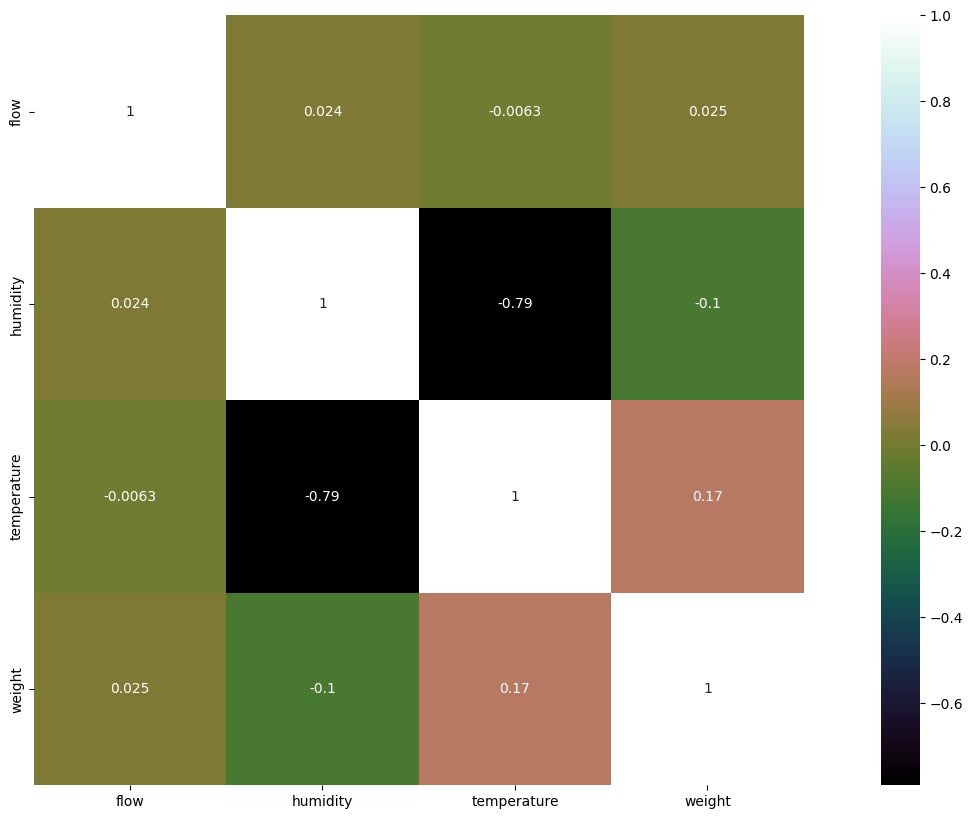

In [7]:
#Correlation Map

import seaborn as sns

corr_mat = finaldf.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

#Creating a heatmap using the flow, humidity, temperature, and weight data we have. 

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model_lm = ols('flow ~ humidity + temperature + weight', 
               data = finaldf).fit()
#A linear regression model is created using the variables as independent variables (x).

aov_table = sm.stats.anova_lm(model_lm, typ=2)
#Creating an ANOVA table for the model we have constructed.
print(aov_table)

esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
#It is used to calculate the effect size (eta squared).
print('\n',esq_sm)

                sum_sq      df         F    PR(>F)
humidity      0.057023     1.0  7.392333  0.006563
temperature   0.018071     1.0  2.342661  0.125911
weight        0.040979     1.0  5.312442  0.021197
Residual     67.364194  8733.0       NaN       NaN

 0.7593566874198754


In [13]:
import sklearn

clf2 = sklearn.linear_model.BayesianRidge()
print(clf2.fit(X,y))
print(clf2.predict(X))

BayesianRidge()
[-0.00737045 -0.00739665 -0.00736673 ... -0.00538014 -0.00512439
 -0.00527294]


In [14]:
print(sklearn.feature_selection.f_regression(X, y))

(array([4.88190466, 0.34378546, 5.40884345]), array([0.0271655 , 0.55766744, 0.02005776]))


In [19]:
import seaborn as sns
X = finaldf[["humidity","temperature"]].head(8737)
y = weight_1.head(8737)
print(X.describe())
print('\n', y.describe())


print("\n Regression of Weight")
model = sm.OLS(y,X).fit()

pred = model.predict(X)

print(model.summary())

          humidity  temperature
count  8737.000000  8737.000000
mean     74.897176    16.506131
std      15.596232    10.510292
min     -66.710000    -6.607883
25%      61.863167     7.206083
50%      79.757667    16.540000
75%      87.646667    25.171167
max      99.651667    35.733333

 count    8737.000000
mean       52.565870
std         0.376954
min        47.127900
25%        52.570100
50%        52.633200
75%        52.666900
max        52.953200
Name: weight, dtype: float64

 Regression of Weight
                                 OLS Regression Results                                
Dep. Variable:                 weight   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          4.410e+05
Date:                Wed, 17 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:54:55   Log-Likeli